<a href="https://colab.research.google.com/github/KoshalaChathuranga/Diamond_Prices_Data_Analysis/blob/main/Diamond_Prices_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fisrt Download data from the Kaggle

Set Up Kaggle API: You need to install the Kaggle API and get your Kaggle API credentials file. Follow these steps:

    

*   Go to your Kaggle account settings.
*   Scroll down to the API section and click on "Create New API Token". This will download a file named kaggle.json containing your API credentials.
*   Upload this file to your Google Drive.








Mount Google Drive in Colab

*   mount your Google Drive where you uploaded the Kaggle API credentials file. Run the following code and follow the instructions to authenticate:



In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Install Kaggle API

*   Install the Kaggle API package in your Colab environment by running the following command:



In [ ]:
!pip install -q kaggle

Copy Kaggle API Credentials


*   Copy the kaggle.json file from your Google Drive to the appropriate directory in your Colab environment:







In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Kaggle-token/kaggle.json ~/.kaggle/

Download the Dataset

*   Use the Kaggle API to download the dataset. Go to the dataset page on Kaggle and click on the "Copy API command" button (next to the "Download" button). This will copy the command to download the dataset using the Kaggle API. Paste the command in a code cell in your Colab notebook and run it.



In [ ]:
!kaggle datasets download -d shivam2503/diamonds

  0% 0.00/733k [00:00<?, ?B/s]
100% 733k/733k [00:00<00:00, 137MB/s]


Unzip the Dataset

*   After the dataset is downloaded, you may need to unzip it. You can do this using the following command:



In [ ]:
!unzip diamonds.zip

Archive:  diamonds.zip
  inflating: diamonds.csv            


# Import Required Libraries

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras.models
from keras.layers import Normalization, Dense, InputLayer
from keras.optimizers import Adam
from keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from keras.metrics import RootMeanSquaredError

# Load and Explore the data

In [ ]:
file_path = "/content/diamonds.csv"

In [ ]:
# Load your data into a Pandas DataFrame
data = pd.read_csv(file_path, index_col=0)
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
# Plot all possible plots simultaneously using pairplot
sns.pairplot(data)

In [ ]:
#You can see there are 11 inputs here in this dataset
data.shape

(53940, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


# Data Preprocessing

In [ ]:
data = data.drop(data[data["x"]==0].index)
data = data.drop(data[data["y"]==0].index)
data = data.drop(data[data["z"]==0].index)
data.shape

(53920, 10)

In [ ]:
colomns = (data.dtypes =="object")
object_cols = list(colomns[colomns].index)
print("Categorical variables:")
print(object_cols)

Categorical variables:
['cut', 'color', 'clarity']


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

label_data = data.copy()


label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(label_data[col])
label_data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
2,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
3,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
4,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
5,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
from sklearn.model_selection import train_test_split


X = label_data.drop(["price"], axis=1)
y = label_data["price"]

# Split the data into training and testing sets (75% train, 25% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Further split the training data into training and validation sets (60% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Build the Model

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[9]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

In [ ]:
model.compile(
    optimizer='adam',
    loss='mae',
)

# Train the Model

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    batch_size=1024,
    epochs=10,
)

Epoch 1/10
32/32 [==============================] - 10s 318ms/step - loss: 3865.6431 - val_loss: 3856.0403
Epoch 2/10
32/32 [==============================] - 11s 339ms/step - loss: 3835.2373 - val_loss: 3819.8298
Epoch 3/10
32/32 [==============================] - 11s 341ms/step - loss: 3799.0352 - val_loss: 3786.8342
Epoch 4/10
32/32 [==============================] - 11s 356ms/step - loss: 3757.0872 - val_loss: 3745.4187
Epoch 5/10
32/32 [==============================] - 11s 337ms/step - loss: 3709.4583 - val_loss: 3693.6191
Epoch 6/10
32/32 [==============================] - 12s 368ms/step - loss: 3656.2161 - val_loss: 3631.7041
Epoch 7/10
32/32 [==============================] - 11s 332ms/step - loss: 3597.5420 - val_loss: 3107.1248
Epoch 8/10
32/32 [==============================] - 12s 357ms/step - loss: 3533.3533 - val_loss: 2285.0061
Epoch 9/10
32/32 [==============================] - 11s 340ms/step - loss: 3463.6677 - val_loss: 2386.0906
Epoch 10/10
32/32 [==================

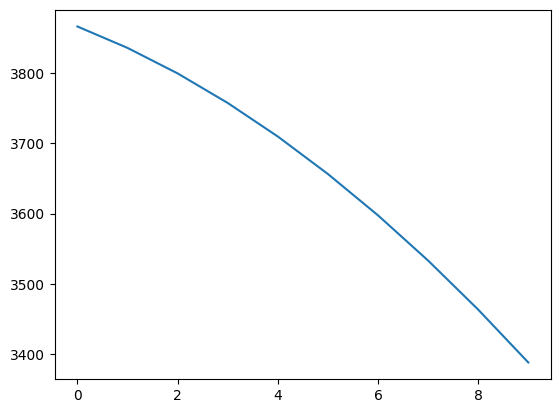

In [ ]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

# Test the Model

In [ ]:
# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)


422/422 [==============================] - 5s 13ms/step - loss: 2468.7100
Test Loss: 2468.7099609375


In [ ]:
import random

random.seed(42)

# Randomly select 10 indices from the test set
random_indices = random.sample(range(len(X_test)), 5)

# Predictions for the randomly selected rows
predictions = model.predict(X_test.iloc[random_indices])

for i in random_indices:
    print("Features (X):", X_test.iloc[i].values)
    print("Actual Label (y):", y_test.iloc[i])
    print("Predicted Label:", predictions[random_indices.index(i)][0])
    print("-------------------------------------------")


1/1 [==============================] - 0s 30ms/step
Features (X): [ 0.54  4.    1.    2.   63.2  57.    5.15  5.2   3.27]
Actual Label (y): 1440
Predicted Label: 1501.6241
-------------------------------------------
Features (X): [ 1.04  2.    2.    5.   61.6  56.    6.53  6.55  4.03]
Actual Label (y): 8415
Predicted Label: 2144.7942
-------------------------------------------
Features (X): [ 0.31  2.    3.    5.   62.4  55.    4.3   4.32  2.69]
Actual Label (y): 544
Predicted Label: 1127.5295
-------------------------------------------
Features (X): [ 0.4   3.    0.    3.   60.4  59.    4.83  4.8   2.91]
Actual Label (y): 855
Predicted Label: 1441.6681
-------------------------------------------
Features (X): [ 0.65  4.    2.    4.   59.3  56.    5.64  5.76  3.37]
Actual Label (y): 2406
Predicted Label: 1765.8701
-------------------------------------------
